<a href="https://colab.research.google.com/github/opanasyuzhenkova/university-portfolio/blob/main/6sem_lr5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторная работа 5

In [ ]:
import numpy as np
from numpy import isnan
import pandas as pd

data = pd.read_csv('web_traffic.tsv', delimiter='\t', names=['hours', 'n_requests'])

hours_data = data['hours'][data['n_requests'].notna()]
requests_data = data['n_requests'][data['n_requests'].notna()]

# print(hours_data, requests_data)

In [ ]:
train_border = 2.2
final_border = 4.2

train_data  = int(train_border * 7 * 24) # 588
final_border = int(final_border * 7 * 24)


train_data_start = int(train_border * 7 * 24)  # Начальная граница тренировочного диапазона
train_data_end = int(final_border * 7 * 24)  # Конечная граница тренировочного диапазона

# train set
hours_data_train = hours_data[train_data_start:train_data_end:2]
requests_data_train = requests_data[train_data_start:train_data_end:2]

# test set
hours_data_test, requests_data_test = hours_data[final_border:], requests_data[final_border:]


from sklearn.metrics import r2_score, mean_squared_error

f1p, residuals, rank, sv, rcond = np.polyfit(hours_data_train, requests_data_train, 1, full=True)
f2p, residuals, rank, sv, rcond = np.polyfit(hours_data_train, requests_data_train, 2, full=True)
f3p, residuals, rank, sv, rcond = np.polyfit(hours_data_train, requests_data_train, 3, full=True)
f5p, residuals, rank, sv, rcond = np.polyfit(hours_data_train, requests_data_train, 5, full=True)
f20p, residuals, rank, sv, rcond = np.polyfit(hours_data_train, requests_data_train, 20, full=True)

f1x = np.poly1d(f1p)
f2x = np.poly1d(f2p)
f3x = np.poly1d(f3p)
f5x = np.poly1d(f5p)
f20x = np.poly1d(f20p)

r2_array = []
r2_array.append(r2_score(requests_data_test,  f1x(hours_data_test)))
r2_array.append(r2_score(requests_data_test,  f2x(hours_data_test)))
r2_array.append(r2_score(requests_data_test,  f3x(hours_data_test)))
r2_array.append(r2_score(requests_data_test,  f5x(hours_data_test)))
r2_array.append(r2_score(requests_data_test,  f20x(hours_data_test)))

rmse1 = mean_squared_error(requests_data_train, f1x(hours_data_train), squared=False)
rmse_1_test = mean_squared_error(requests_data_test, f1x(hours_data_test), squared=False)


rmse2 = mean_squared_error(requests_data_train, f2x(hours_data_train), squared=False)
rmse_2_test = mean_squared_error(requests_data_test, f2x(hours_data_test), squared=False)

rmse3 = mean_squared_error(requests_data_train, f3x(hours_data_train), squared=False)
rmse_3_test = mean_squared_error(requests_data_test, f3x(hours_data_test), squared=False)

rmse5 = mean_squared_error(requests_data_train, f5x(hours_data_train), squared=False)
rmse_5_test = mean_squared_error(requests_data_test, f5x(hours_data_test), squared=False)

rmse20 = mean_squared_error(requests_data_train, f20x(hours_data_train), squared=False)
rmse_20_test = mean_squared_error(requests_data_test, f20x(hours_data_test), squared=False)

print('R2 score всех моделей: ', r2_array)
print('--------')
print(f"RMSE f1x (для данных c {train_border} недели по 4.2 недели)= {rmse1:.5}")
print(f"RMSE f1x (только для данных с 4.2 недели)= {rmse_1_test:.5}")
print('--------')
print(f"RMSE f2x (для данных c {train_border} недели по 4.2 недели)= {rmse2:.5}")
print(f"RMSE f2x (только для данных с 4.2 недели)= {rmse_2_test:.5}")
print('--------')
print(f"RMSE f3x (для данных c {train_border} недели по 4.2 недели)= {rmse3:.5}")
print(f"RMSE f3x (только для данных с 4.2 недели)= {rmse_3_test:.5}")
print('--------')
print(f"RMSE f5x (для данных c {train_border} недели по 4.2 недели)= {rmse5:.5}")
print(f"RMSE f5x (только для данных с 4.2 недели)= {rmse_5_test:.5}")
print('--------')
print(f"RMSE f20x (для данных c {train_border} недели по 4.2 недели)= {rmse20:.5}")
print(f"RMSE f20x (только для данных с 4.2 недели)= {rmse_20_test:.5}")


R2 score всех моделей:  [-3.148930344439564, 0.15375022096020896, 0.4493447238875924, 0.42063300392205694, 0.4492368333360123]
--------
RMSE f1x (для данных c 2.2 недели по 4.2 недели)= 582.51
RMSE f1x (только для данных с 4.2 недели)= 1011.8
--------
RMSE f2x (для данных c 2.2 недели по 4.2 недели)= 432.71
RMSE f2x (только для данных с 4.2 недели)= 456.96
--------
RMSE f3x (для данных c 2.2 недели по 4.2 недели)= 391.42
RMSE f3x (только для данных с 4.2 недели)= 368.61
--------
RMSE f5x (для данных c 2.2 недели по 4.2 недели)= 383.73
RMSE f5x (только для данных с 4.2 недели)= 378.1
--------
RMSE f20x (для данных c 2.2 недели по 4.2 недели)= 348.9
RMSE f20x (только для данных с 4.2 недели)= 368.65


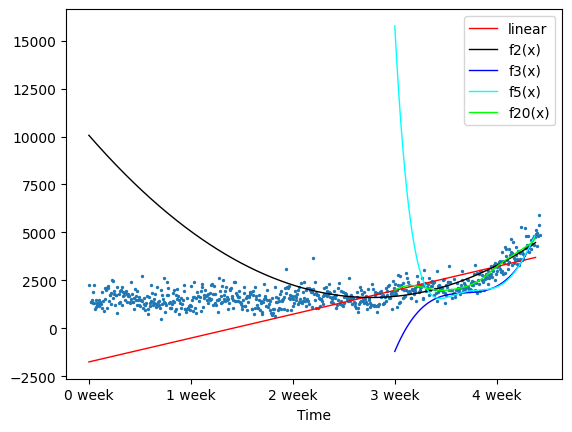

In [ ]:
# Визуализация

import matplotlib.pyplot as plt

plt.scatter(hours_data, requests_data, s=2)
plt.xlabel('Time')

plt.xticks([w*7*24 for w in range(6)],["%i week" %w for w in range(6)])


fx = np.linspace(0, hours_data[len(hours_data)], len(hours_data))

fy = f1x(fx)
f2y = f2x(fx)

plt.plot(fx, fy, linewidth=1.0, color='red', label='linear')
plt.plot(fx, f2y, linewidth=1.0, color='black', label='f2(x)')

fx = np.linspace(1.5*7*24, hours_data[len(hours_data)-1], len(hours_data))

f3y = f3x(fx)
f5y = f5x(fx)
fx = np.linspace(3*7*24, hours_data[len(hours_data)-1], len(hours_data))
f20y = f20x(fx)


plt.plot(fx, f3y, linewidth=1.0, color='blue', label='f3(x)')
plt.plot(fx, f5y, linewidth=1.0, color='cyan', label='f5(x)')
plt.plot(fx, f20y, linewidth=1.0, color='lime', label='f20(x)')
plt.legend()
plt.autoscale(tight=False)

plt.show()


##Анализ результатов

*Тренировочный набор* - каждое 2-ое значение из диапазона (2.2 - 4.2)

Судя по полученным данным можно сделать вывод, что модель **полинома 3-ей степени** и **модель полинома 20-й степени** показывают наилучшие результаты среди всех моделей.

Обе эти модели имеют наименьшее значение RMSE как для тренировочного набора данных (2.2 недели по 4.2 недели), так и для тестового (с 4.2 недели). Кроме того, у них наиболее высокий R2 score, что указывает на лучшую способность моделей описывать данные.

**Линейная модель** показывает плохие результаты, с отрицательным значением R2 score, что указывает на низкую предсказательную способность.